## Machine Learning Assignment

To submit the assignment you can download the completed assignment in the **.ipynb** format **as well as** the **.pdf** from the notebook (go to File->Download as) and upload the same on Canvas. If someone is not able to upload the file in .ipynb format or .pdf, please upload the .html version.

### Information about the dataset

The Iris dataset, available in the scikit-learn (sklearn) package, is a classic dataset frequently used for machine learning and data analysis tasks. It contains measurements of various attributes of iris flowers, along with their corresponding species. The dataset consists of the following four features, which represent different measurements of the iris flowers. Some information about this dataset:


- Number of Instances: 150


- Number of Attributes: 4


- Attribute information:

   Given is the attribute name, attribute type, the measurement unit 
	* Sepal length (continuous) - in centimeters
	* Sepal width (continuous) - in centimeters
    * Petal length (continuous) - in centimeters
    * Petal width (continuous) - in centimeters


The target variable represents the species of the iris flowers. There are three classes of iris species in the dataset:

    * Setosa
    * Versicolor
    * Virginica

(for an image of these three species, please see here -https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)


In the first part of this homework, we will use this dataset to build a prediction model to distinguish the species from each other.

In the second half of this homework, we try to cluster the iris dataset used Kmeans Clustering.

In [27]:
#!pip install --upgrade scikit-learn
import sklearn
import sklearn.datasets

import pandas as pd
import pandas.plotting 
import seaborn as sns

import numpy as np

from os import system

import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("white")

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#000000'])

In [28]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.metrics import recall_score,precision_score
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
#from sklearn.externals.six import StringIO 

In [29]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Classification

For this assignment, your task is to choose a classification model (e.g., decision trees, regression, or any other suitable method) to predict the class of each instance in the Iris dataset. After building the model, please assess its performance using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score.

Additionally, provide an explanation of the usefulness of the features in predicting the class labels. Explore how each feature contributes to the predictive power of the model and discuss any insights gained from the analysis.


In [47]:
train_df, test_df = train_test_split(df, test_size = 0.25, random_state= 42)

train_y = train_df['target']
test_y = test_df['target']


train_x = train_df.drop(['target'], axis = 1)
test_x = test_df.drop(['target'], axis = 1)

from sklearn.tree import DecisionTreeClassifier

In [48]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)
model.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

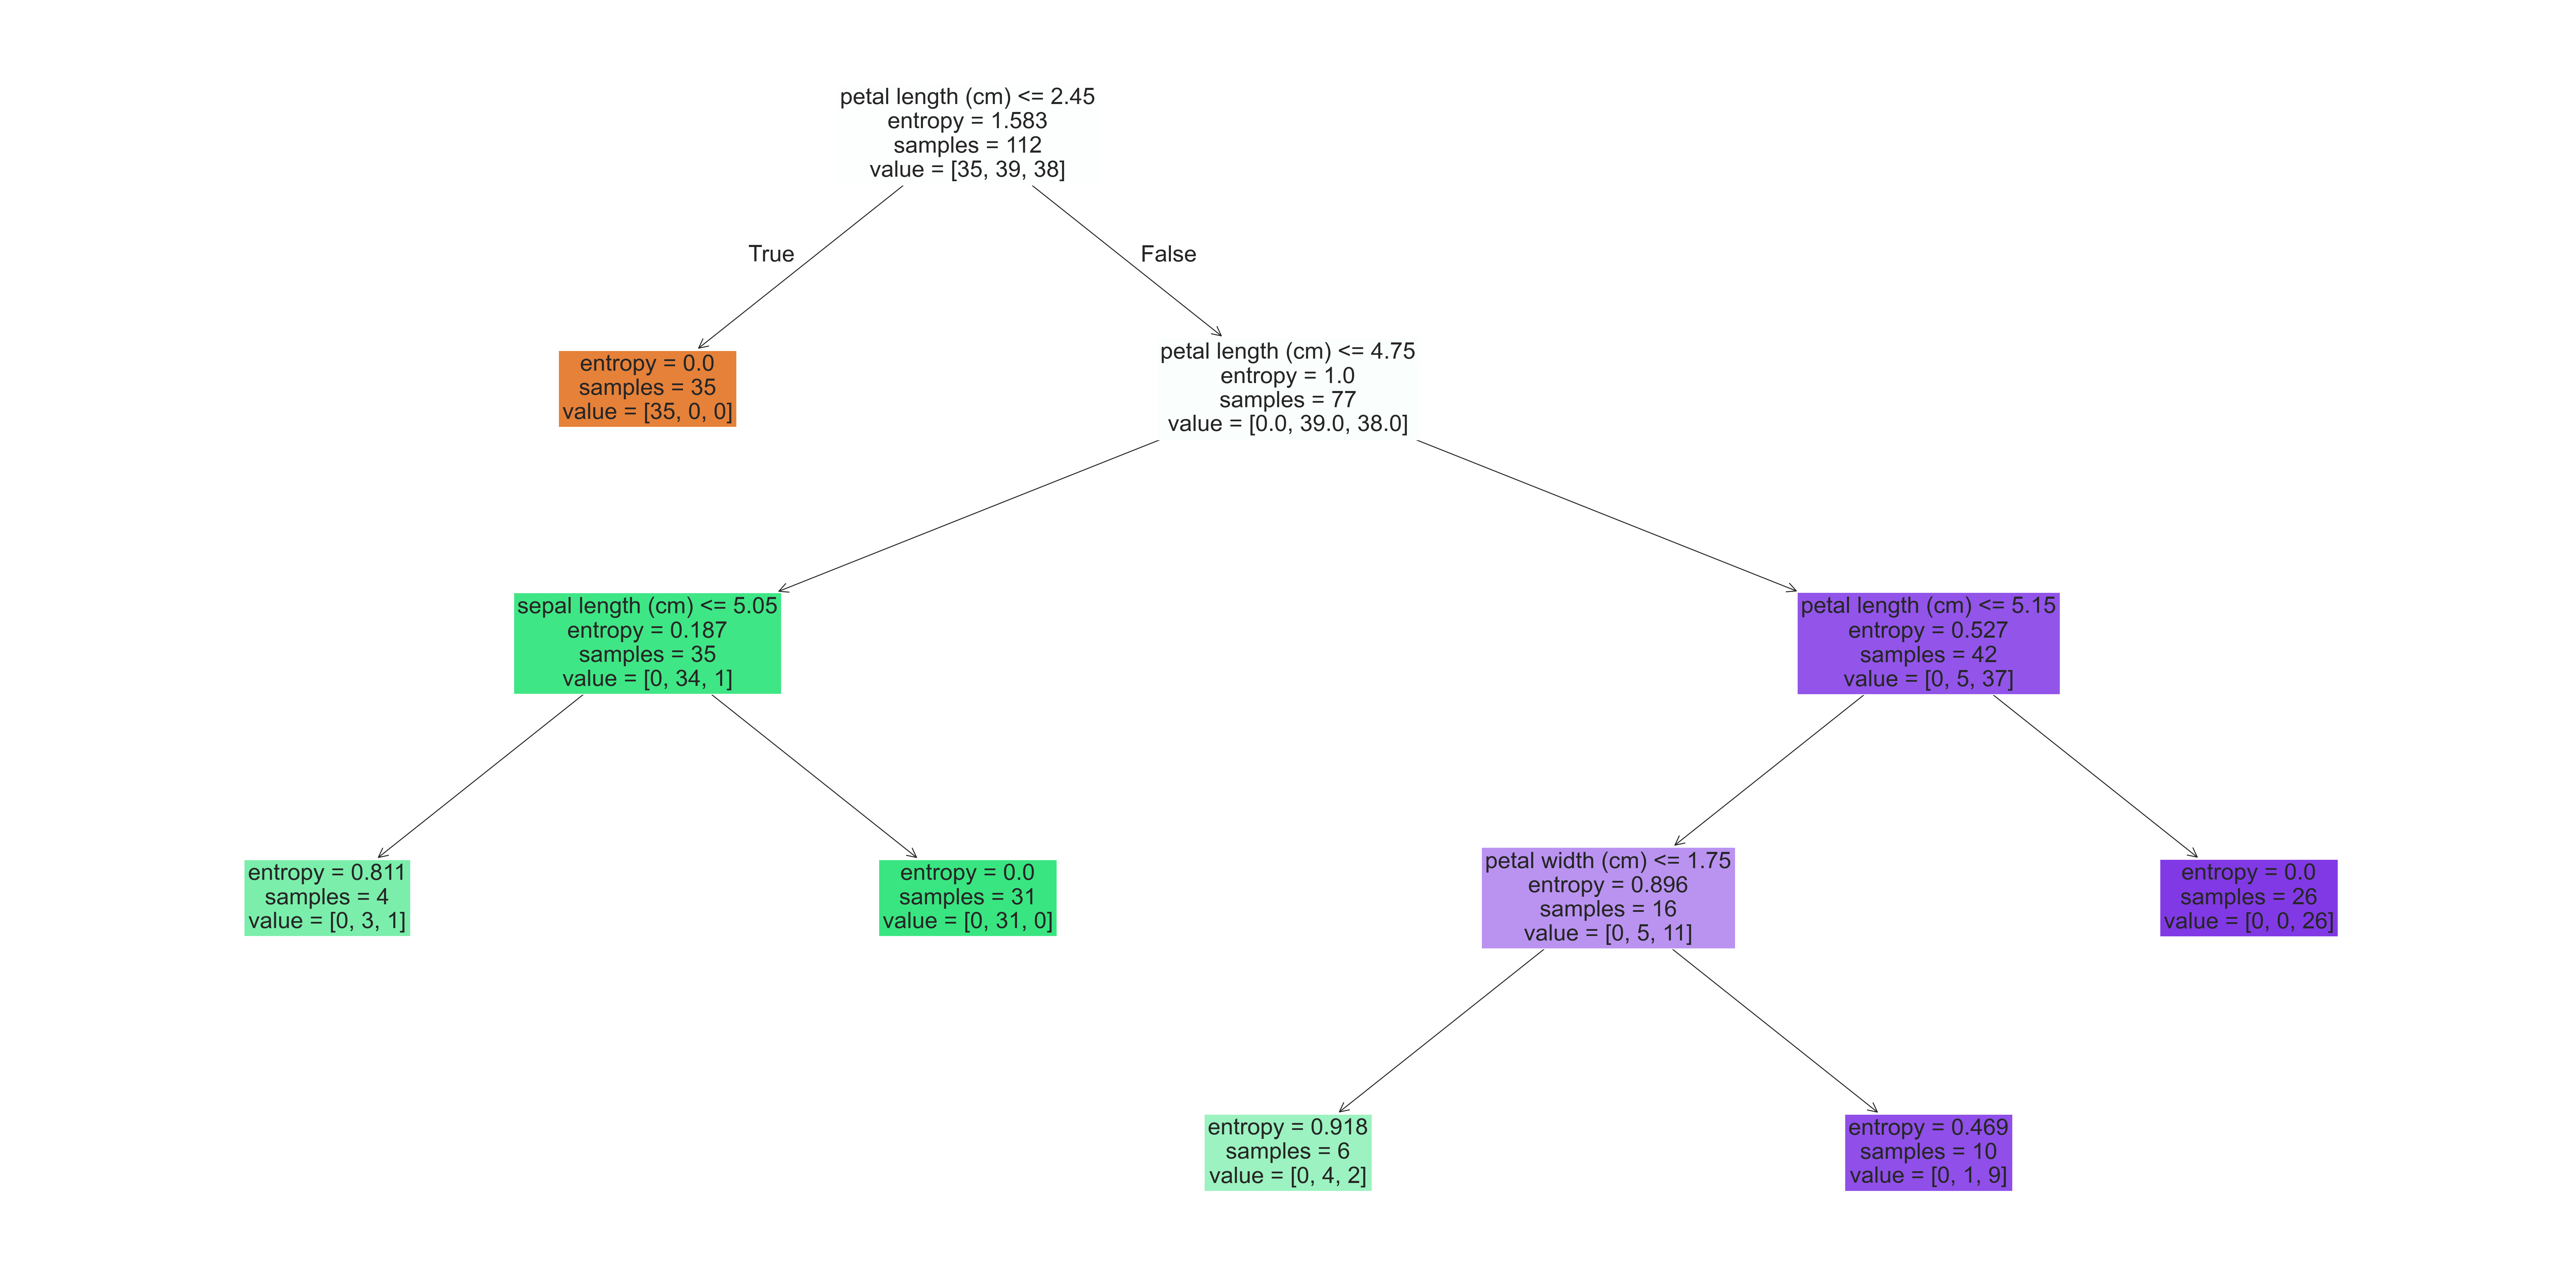

In [58]:
features = [
    "sepal length (cm)",
    "sepal width (cm)",
    "petal length (cm)",
    "petal width (cm)",
]

fig, ax = plt.subplots(figsize=(48, 24), dpi=200)
tree.plot_tree(model,ax=ax,feature_names=features, filled=True, fontsize=24)
plt.show()

In [84]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

In [86]:


f1 = f1_score(y_pred,test_y,average="weighted")

y_train_pred = model.predict(train_x)
y_test_pred  = model.predict(test_x)
classes = ['0','1','2']



Train score 0.9642857142857143
Test score 1.0
F1 Score 1.0
Train Confusion matrix


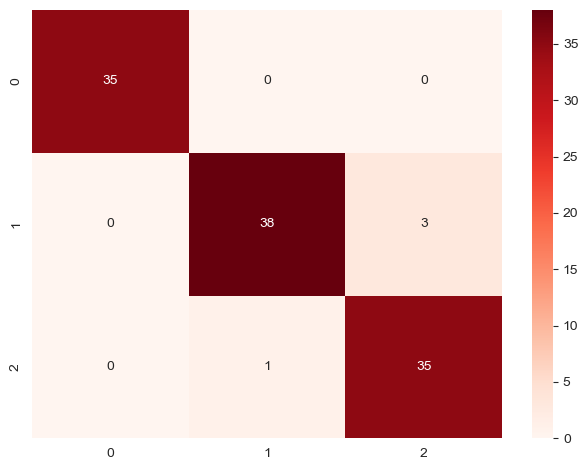

Test Confusion matrix


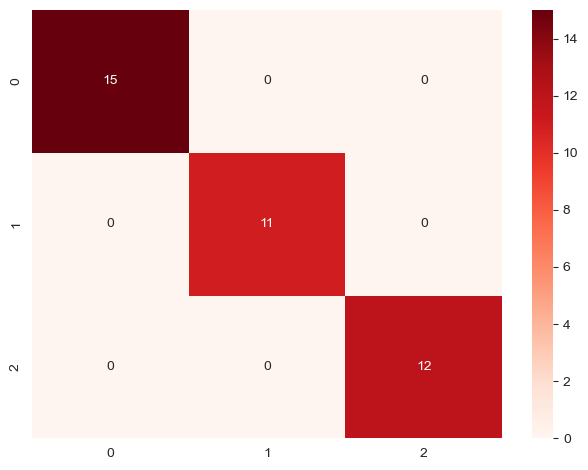

In [87]:
import seaborn as sns

def plot_confusionmatrix(y_train_pred,y_test_pred,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_test_pred)
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Reds', fmt='g')
    plt.tight_layout()
    plt.show()



print(f'Train score {accuracy_score(y_train_pred,train_y)}')
print(f'Test score {accuracy_score(y_test_pred,test_y)}')
print("F1 Score",f1)
plot_confusionmatrix(y_train_pred,train_y,dom='Train')
plot_confusionmatrix(y_test_pred,test_y,dom='Test')

### K-Means Clustering

Use K-Means clustering to cluster the iris dataset and use the elbow method to determine the optimal number of clusters. In the end, you may use visulization to visulize the centroids and the clusters. 

K-Means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

How to implement K-Means Clustering?
    1. Choose the number of clusters k.
    2. Randomly select K initial cluster centroids.
    3. Assign each data point to the nearest centroid, forming K clusters.
    4. Recalculate the centroids of the K clusters based on the mean of the data points assigned to each cluster.
    5. Iterate steps 3 and 4 until convergence, where centroids no longer change significantly or a maximum number of iterations is reached.
    6. Convergence: Once convergence is reached, the algorithm stops, and the final clusters are obtained.


In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns,
    index=df.index)

In [66]:
print(df_scaled)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            -0.900681          1.019004          -1.340227         -1.315444   
1            -1.143017         -0.131979          -1.340227         -1.315444   
2            -1.385353          0.328414          -1.397064         -1.315444   
3            -1.506521          0.098217          -1.283389         -1.315444   
4            -1.021849          1.249201          -1.340227         -1.315444   
..                 ...               ...                ...               ...   
145           1.038005         -0.131979           0.819596          1.448832   
146           0.553333         -1.282963           0.705921          0.922303   
147           0.795669         -0.131979           0.819596          1.053935   
148           0.432165          0.788808           0.933271          1.448832   
149           0.068662         -0.131979           0.762758          0.790671   

       target  
0   -1.2247

In [67]:
df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,1.224745
146,0.553333,-1.282963,0.705921,0.922303,1.224745
147,0.795669,-0.131979,0.819596,1.053935,1.224745
148,0.432165,0.788808,0.933271,1.448832,1.224745


C:\Users\lbowe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lbowe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lbowe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lbowe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

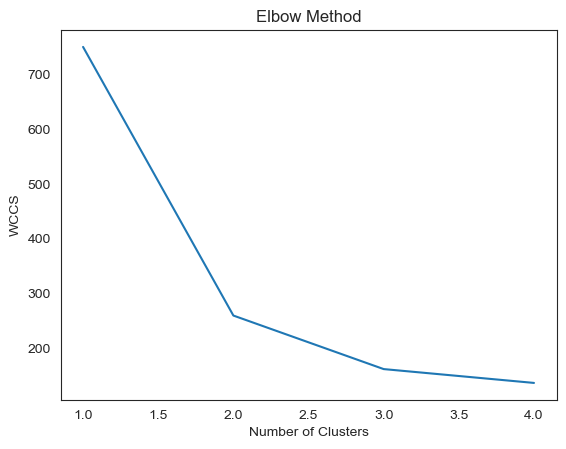

In [72]:
wccs = [] # Within cluster sum of squares
for i in range(1,5):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wccs.append(kmeans.inertia_
               )

plt.plot(range(1,5),wccs)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCCS')
plt.show()

In [73]:
#Running the elbow method, determining number of clusters at 2

k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_scaled)

OP_NUM_THREADS = 3


C:\Users\lbowe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [77]:
init_method = 'random' 
kmeans = KMeans(n_clusters=k, init=init_method)
kmeans.fit(df_scaled)

C:\Users\lbowe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=2)

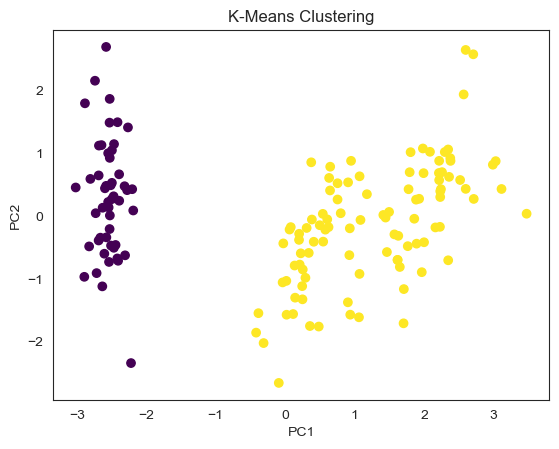

In [80]:
from sklearn.decomposition import PCA

cluster_assignments = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.scatter(df_pca[:,0], df_pca[:,1], c=cluster_assignments, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=0,c='red',marker='X')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.show()